In [10]:
import pandas as pd

In [11]:
import numpy as np

In [12]:
import seaborn as sns

In [13]:
import os

In [14]:
import matplotlib.pyplot as plt

In [15]:
for dirname, _, filenames in os.walk('C:\\Users\\KINJAL\\Desktop\\Data Science\\GearBox'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\KINJAL\Desktop\Data Science\GearBox\BrokenTooth\b30hz0.csv
C:\Users\KINJAL\Desktop\Data Science\GearBox\BrokenTooth\b30hz10.csv
C:\Users\KINJAL\Desktop\Data Science\GearBox\BrokenTooth\b30hz20.csv
C:\Users\KINJAL\Desktop\Data Science\GearBox\BrokenTooth\b30hz30.csv
C:\Users\KINJAL\Desktop\Data Science\GearBox\BrokenTooth\b30hz40.csv
C:\Users\KINJAL\Desktop\Data Science\GearBox\BrokenTooth\b30hz50.csv
C:\Users\KINJAL\Desktop\Data Science\GearBox\BrokenTooth\b30hz60.csv
C:\Users\KINJAL\Desktop\Data Science\GearBox\BrokenTooth\b30hz70.csv
C:\Users\KINJAL\Desktop\Data Science\GearBox\BrokenTooth\b30hz80.csv
C:\Users\KINJAL\Desktop\Data Science\GearBox\BrokenTooth\b30hz90.csv
C:\Users\KINJAL\Desktop\Data Science\GearBox\Healthy\h30hz0.csv
C:\Users\KINJAL\Desktop\Data Science\GearBox\Healthy\h30hz10.csv
C:\Users\KINJAL\Desktop\Data Science\GearBox\Healthy\h30hz20.csv
C:\Users\KINJAL\Desktop\Data Science\GearBox\Healthy\h30hz30.csv
C:\Users\KINJAL\Desktop\Data Science\GearBox\Healthy

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import fft, signal, stats
from tqdm.notebook import tqdm

In [17]:
from tqdm.notebook import tqdm

In [18]:
dfs = []
for dirname, _, filenames in os.walk('C:\\Users\\KINJAL\\Desktop\\Data Science\\GearBox'):
    for filename in (filenames):
        state = filename[0]
        load = int(filename.split('.')[0][5:])
        df = pd.read_csv(os.path.join(dirname, filename))
        df['state'] = state
        df['load'] = load
        dfs.append(df)
df = pd.concat(dfs).reset_index().rename(columns={'index':'sample_index'})

In [19]:
df

,sample_index,a1,a2,a3,a4,state,load
0,0,2.350390,1.454870,-1.667080,-2.055610,b,0
1,1,2.452970,1.400100,-2.825100,0.984487,b,0
2,2,-0.241284,-0.267390,0.793540,0.605862,b,0
3,3,1.130270,-0.890918,0.696969,0.613068,b,0
4,4,-1.296140,0.980479,-1.130560,-0.346971,b,0
...,...,...,...,...,...,...,...
2021114,106747,0.677448,-3.234410,-1.725990,-3.143020,h,90
2021115,106748,-10.575400,7.725400,-2.184010,2.569650,h,90
2021116,106749,-4.033290,2.576920,1.468430,2.728910,h,90
2021117,106750,1.868670,-5.089400,5.342290,-1.365630,h,90


In [20]:
df.sample(3, random_state=42)

,sample_index,a1,a2,a3,a4,state,load
1583597,81134,5.48556,-1.65806,1.07116,0.476970,h,50
1197075,10004,-7.97032,3.21429,-4.96447,-0.314574,h,20
17675,17675,-2.77924,-1.95478,-1.11393,5.013970,b,0


In [21]:
sensor_readings = df.melt(
    id_vars=['sample_index','state','load'],
    value_vars=['a1','a2','a3','a4'],
    var_name='sensor',
    value_name='reading'
)

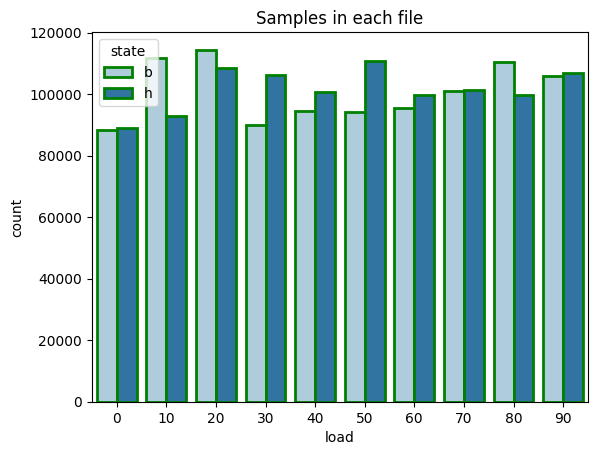

In [22]:
sns.countplot(
    data=sensor_readings[sensor_readings.sensor=='a1'],
    x='load',
    hue='state',
    palette='Paired',
    edgecolor="green",
    linewidth=2
)
plt.title("Samples in each file")
plt.show()

In [23]:
lowest_samples = df.groupby(['state','load']).sample_index.count().min()
print(f'Lowest Number Of Samples = {lowest_samples}')
print(f'Translates to {lowest_samples/30:0.2f} seconds or {lowest_samples/30/60:0.2f} minutes')

Lowest Number Of Samples = 88320
Translates to 2944.00 seconds or 49.07 minutes


In [24]:
def rdg(df, state=None, load=None, sensor=None):
    df_st = df[df.state==state] if state is not None else df
    df_lo = df_st[df_st.load==load] if load is not None else df_st
    df_se = df_lo[df_lo.sensor==sensor] if sensor is not None else df_lo
    return df_se

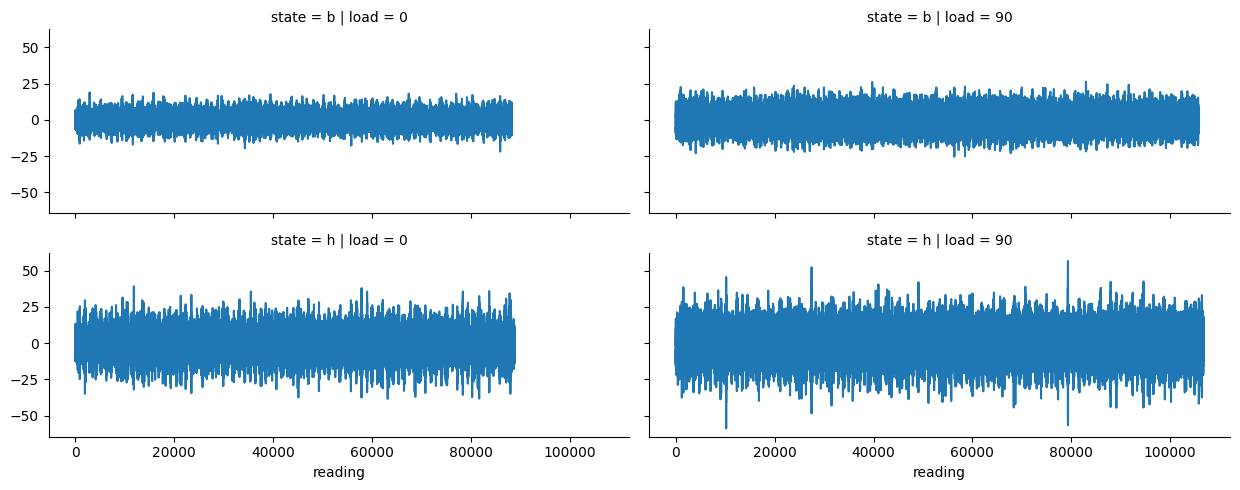

In [31]:
g = sns.FacetGrid(
    data=pd.concat([
        rdg(sensor_readings, load=0, sensor='a1'),
        rdg(sensor_readings, load=90, sensor='a1'),
    ]),
    col='load',
    row='state',
    height=2.5,
    aspect=2.5,
    palette='tab10'
)
g.map(plt.plot, 'reading')
plt.show()

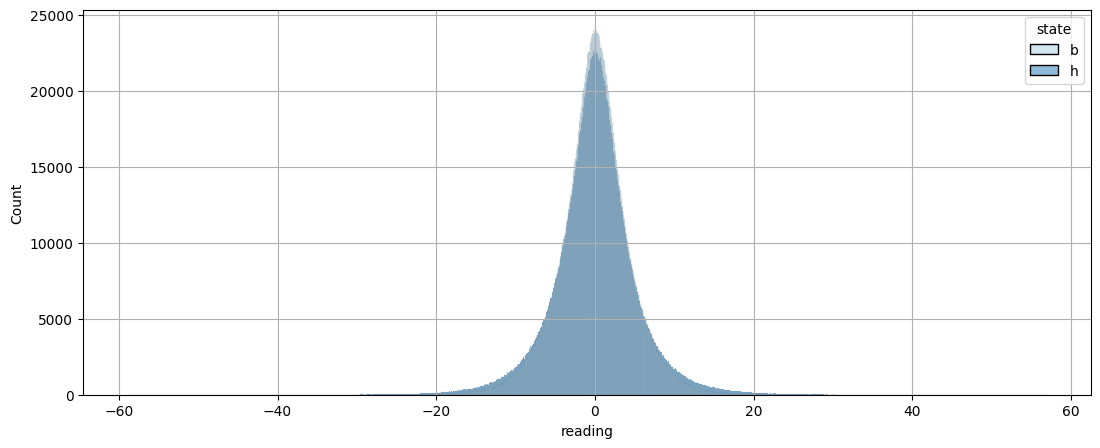

In [39]:
plt.figure(figsize=(13,5))
sns.histplot(
    data=sensor_readings,
    hue='state',
    x='reading',
    palette='Paired'
)
plt.grid()
plt.show()

In [34]:
display(sensor_readings.groupby(['sensor','state']).reading.std().unstack())
print(f"Standard deviation including sensor a1: {sensor_readings.reading.std()}")
print(f"Standard deviation excluding sensor a1: {sensor_readings[sensor_readings.sensor!='a1'].reading.std()}")

state,b,h
sensor,,
a1,4.602696,7.381206
a2,4.389516,4.427153
a3,3.808909,4.110277
a4,4.408367,4.523553


Standard deviation including sensor a1: 4.822152445519268
Standard deviation excluding sensor a1: 4.285349925978811


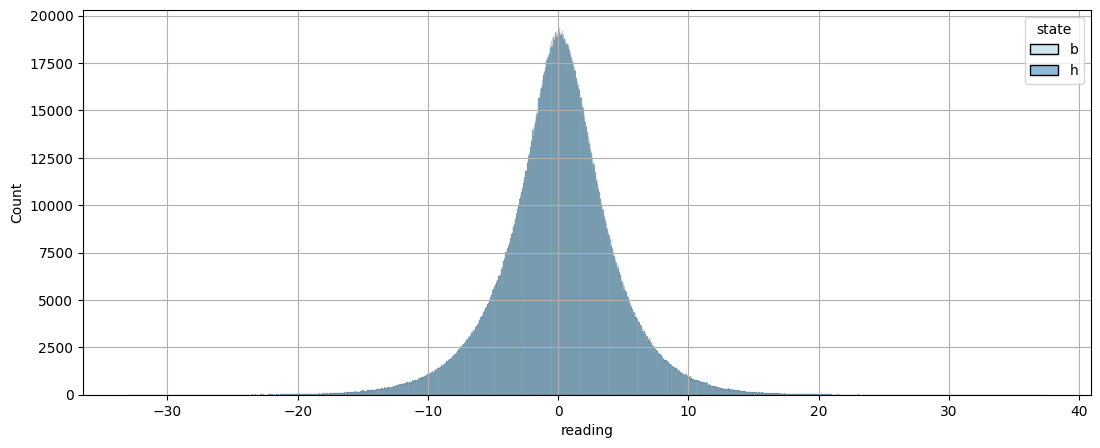

In [38]:
readings = sensor_readings[sensor_readings.sensor!='a1']
plt.figure(figsize=(13,5))
sns.histplot(
    data=readings,
    hue='state',
    x='reading',
    palette='Paired'
)
plt.grid()
plt.show()

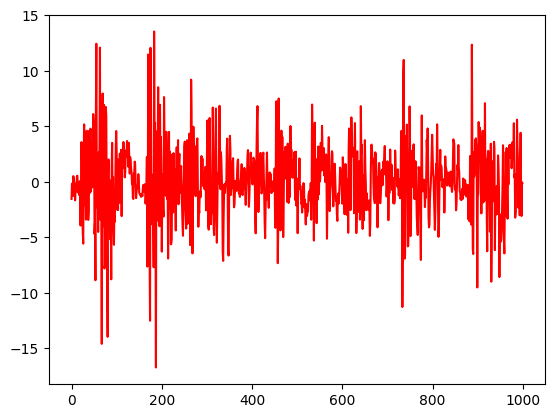

In [43]:
x = rdg(sensor_readings, 'h', 10, 'a4').reading.values[:1000]
plt.plot(x,color='r')
plt.show()


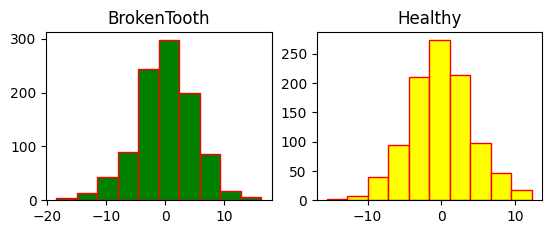

In [56]:
plt.subplot(2,2,1)
plt.hist(rdg(sensor_readings, 'b', 90, 'a2').reading.values[:1000], color='green', alpha=1,edgecolor='r')
plt.title("BrokenTooth")
plt.subplot(2,2,2)
plt.hist(rdg(sensor_readings, 'h', 90, 'a2').reading.values[:1000], color='yellow', alpha=1,edgecolor='r')
plt.title("Healthy")
plt.show()

In [58]:
data = []
labels = []
for (state,load,sensor),g in sensor_readings.groupby(['state','load','sensor']):
    vals = g.reading.values
    splits = np.split(vals, range(1000,vals.shape[0],1000))
    for s in splits[:-1]: 
        data.append({
            'sensor_a1': int(sensor=='a1'),
            'sensor_a2': int(sensor=='a2'),
            'sensor_a3': int(sensor=='a3'),
           
            'load': load,
            'mean': np.mean(s),
            'std': np.std(s),
            'kurt': stats.kurtosis(s),
            'skew': stats.skew(s),
            'moment': stats.moment(s),
        })
        labels.append(int(state=='b')) 

df_data = pd.DataFrame(data)
data = df_data.values
labels = np.array(labels)
(data.shape, labels.shape)

((8036, 9), (8036,))

In [59]:
print(f'Total samples: {len(labels)}')
print(f'Fault class: {np.sum(labels)} ({np.sum(labels)/len(labels):0.1%})')

Total samples: 8036
Fault class: 4000 (49.8%)


In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, labels,
    train_size=0.8,
    random_state=42,
    stratify=labels
)
print(f'Training data: {X_train.shape}')
print(f'Test data: {X_test.shape}')





Training data: (6428, 9)
Test data: (1608, 9)
